<a href="https://colab.research.google.com/github/anuravi98/fastai-notebooks/blob/master/Imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai.text import *


In [0]:
path = untar_data(URLs.IMDB_SAMPLE)

In [0]:
df = pd.read_csv(path/'texts.csv')
df.head()


,label,text,is_valid
0,negative,Un-bleeping-believable! Meg Ryan doesn't even ...,False
1,positive,This is a extremely well-made film. The acting...,False
2,negative,Every once in a long while a movie will come a...,False
3,positive,Name just says it all. I watched this movie wi...,False
4,negative,This movie succeeds at being one of the most u...,False


In [0]:
data_lm = TextDataBunch.from_csv(path, 'texts.csv')


In [0]:
data_lm.save()


In [0]:
data = load_data(path)

In [0]:
data = TextClasDataBunch.from_csv(path, 'texts.csv')
data.show_batch()


text,target
"xxbos xxup the xxup shop xxup around xxup the xxup corner is one of the sweetest and most feel - good romantic comedies ever made . xxmaj there 's just no getting around that , and it 's hard to actually put one 's feeling for this film into words . xxmaj it 's not one of those films that tries too hard , nor does it come up with",positive
"xxbos xxmaj now that xxmaj che(2008 ) has finished its relatively short xxmaj australian cinema run ( extremely limited xxunk screen in xxmaj sydney , after xxunk ) , i can xxunk join both xxunk of "" xxmaj at xxmaj the xxmaj movies "" in taking xxmaj steven xxmaj soderbergh to task . \n \n xxmaj it 's usually satisfying to watch a film director change his style /",negative
"xxbos xxmaj this film sat on my xxmaj tivo for weeks before i watched it . i dreaded a self - indulgent xxunk flick about relationships gone bad . i was wrong ; this was an xxunk xxunk into the screwed - up xxunk of xxmaj new xxmaj xxunk . \n \n xxmaj the format is the same as xxmaj max xxmaj xxunk ' "" xxmaj la xxmaj ronde",positive
"xxbos xxmaj many neglect that this is n't just a classic due to the fact that it 's the first xxup 3d game , or even the first xxunk - up . xxmaj it 's also one of the first xxunk games , one of the xxunk definitely the first ) truly claustrophobic games , and just a pretty well - rounded gaming experience in general . xxmaj with graphics",positive
"xxbos i really wanted to love this show . i truly , honestly did . \n \n xxmaj for the first time , gay viewers get their own version of the "" xxmaj the xxmaj bachelor "" . xxmaj with the help of his obligatory "" hag "" xxmaj xxunk , xxmaj james , a good looking , well - to - do thirty - something has the chance",negative


In [0]:
data.vocab.itos[:10]
data = (TextList.from_csv(path, 'texts.csv', cols='text')
                .split_from_df(col=2)
                .label_from_df(cols=0)
                .databunch())


In [0]:
bs=48
path = untar_data(URLs.IMDB)
data_lm = (TextList.from_folder(path)
           #Inputs: all the text files in path
            .filter_by_folder(include=['train', 'test', 'unsup']) 
           #We may have other temp folders that contain text files so we only keep what's in train and test
            .split_by_rand_pct(0.1)
           #We randomly split and keep 10% (10,000 reviews) for validation
            .label_for_lm()           
           #We want to do a language model so we label accordingly
            .databunch(bs=bs))
data_lm.save('data_lm.pkl')

In [0]:
data_lm = load_data(path, 'data_lm.pkl', bs=bs)
data_lm.show_batch()

idx,text
0,"i disliked , however , was all of the plot complications . xxmaj those could have been okay , if the scriptwriters had taken the time to explain all of them through . xxmaj but what was the purpose of the secret society in the mental institution , specifically ? xxmaj why were they protected from xxmaj michael 's damage until a certain point ? xxmaj what exactly were they"
1,"see xxup anything xxup else . xxbos xxmaj comedy is a hard beast to conquer . xxmaj ishimoto fails on all accounts , as a writer and director . xxmaj some things , like making movies that are funny , just need to be left to the professionals . 1 out of 10 . xxmaj awful . xxmaj it was n't funny . i tried to laugh but it just"
2,"is not a huge improvement over the cemetery in xxup plan 9 xxup from xxup outer xxup space . xxmaj it gets worse when we meet the creatures in it . xxmaj there is nothing really wrong with the character design and make - up effects here ( well ... except for the guy with no scalp , the guy with a pointy chin and forehead , and the fat"
3,"like this , people think it 's actually okay to make this filth and ask unsuspecting people to pay money to sit through it . xxmaj it 's sadism . xxbos xxmaj as i post this comment , imdb currently rates xxmaj alfred xxmaj hitchcock 's subpar xxmaj saboteur a 7.3 / 10 . xxmaj personally , i rated it less than half that . xxmaj honestly , i ca"
4,"film , i was disappointed . xxmaj the acting is stilted , and the attempts at comedy are woefully out of place and forced . xxmaj and i 'm sorry , but a boy being chased by a turd in a xxunk is not funny or scary , it 's just stupid . i grew up on the xxmaj bell xxmaj witch legend , so i know quite a bit"


In [0]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


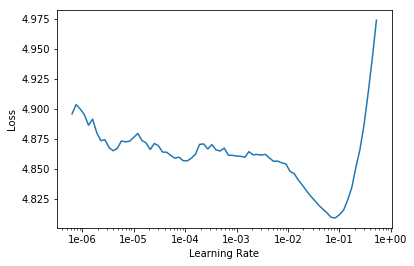

In [0]:
learn.recorder.plot(skip_end=15)


In [0]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))


epoch,train_loss,valid_loss,accuracy,time
0,4.195319,4.066141,0.292898,44:11


In [0]:
#learn.save('fit_head')
learn.load('fit_head')


/usr/local/lib/python3.6/dist-packages/fastai/basic_train.py:327: UserWarning: Wasn't able to properly load the optimizer state again.
  except: warn("Wasn't able to properly load the optimizer state again.")


LanguageLearner(data=TextLMDataBunch;

Train: LabelList (90000 items)
x: LMTextList
xxbos xxmaj most of this film was okay , for a sequel of a sequel of a sequel ... 
 
  i was impressed by the amount of suspense there was ; i xxup had actually expecting that to be chucked out the window in favor of gore , gore , gore . xxmaj it was n't , but there 's some pretty ridiculous deaths . 
 
  xxmaj the thing that i disliked , however , was all of the plot complications . xxmaj those could have been okay , if the scriptwriters had taken the time to explain all of them through . xxmaj but what was the purpose of the secret society in the mental institution , specifically ? xxmaj why were they protected from xxmaj michael 's damage until a certain point ? xxmaj what exactly were they going to do with the baby ? xxmaj how did xxmaj jaime xxmaj lloyd get pregnant , for that matter ? xxmaj why lock her up for 20 years for her to get pregnant , too ? xxmaj why did xxmaj michael kill all his co - c

In [0]:
learn.unfreeze()



In [0]:
learn.fit_one_cycle(3, 1e-3, moms=(0.8,0.7))


NameError: ignored